In [8]:
import urllib.request
import os
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import re


def data_downloader(path):
    print("Importing")
    for i in range(1, 28):
        url = f"https://www.star.nesdis.noaa.gov/smcd/emb/vci/VH/get_TS_admin.php?country=UKR&provinceID={i}&year1=1981&year2=2024&type=Mean"
        vhi_url = urllib.request.urlopen(url)
        file_path = os.path.join(path, f'vhi_id_{i}.csv')
        with open(file_path, 'wb') as out:
            out.write(vhi_url.read())
        print(f"VHI is downloaded")

data_downloader("D:\engineering\lab2")

Importing
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded


In [9]:
arr = []
headers = ['year', 'week', 'SMN', 'SMT', 'VCI', 'TCI', 'VHI', 'provinceID']

provinceID = [22,24,23,25,3,4,8,19,20,21,9,26,10,11,12,13,14,15,16,27,17,18,6,1,2,7,5]
for i in range(1,28):
    df = pd.read_csv(f'vhi_id_{i}.csv', index_col=False, header=1, names=headers)
    df['provinceID'] = provinceID[i-1]

    df["year"] = df["year"].apply(lambda x: re.sub('<[^<]+?>', '', x))
    df.rename(columns= {"VHI<br>": "VHI"})

    
    df = df.drop(df.loc[df['VHI'] == -1].index)
    df = df.iloc[:-1 , :]
    df = df.astype({"year": "int64", "week": "int64"})
    arr.append(df)
    
concatDf = pd.concat(arr)
concatDf = concatDf.sort_values(["provinceID", "year", "week"])
display(concatDf)

,year,week,SMN,SMT,VCI,TCI,VHI,provinceID
0,1982,1,0.068,263.59,63.47,28.34,45.90,1
1,1982,2,0.074,265.78,67.62,23.05,45.34,1
2,1982,3,0.076,267.19,69.37,20.40,44.88,1
3,1982,4,0.075,268.57,65.26,17.93,41.60,1
4,1982,5,0.072,269.24,58.58,20.00,39.29,1
...,...,...,...,...,...,...,...,...
2231,2024,48,0.211,280.75,88.40,11.77,50.08,27
2232,2024,49,0.199,280.07,89.19,9.69,49.44,27
2233,2024,50,0.188,279.76,91.98,5.74,48.86,27
2234,2024,51,0.181,279.52,94.34,3.45,48.89,27


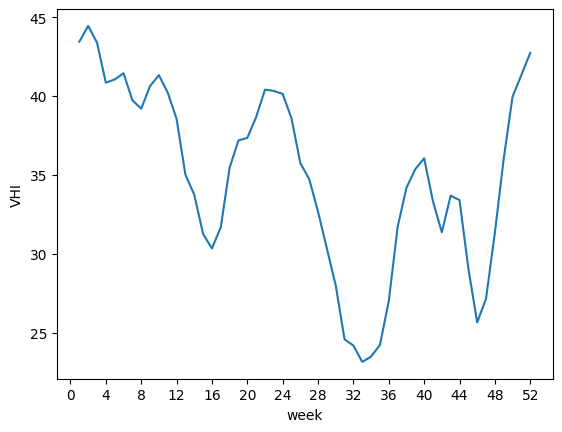

In [13]:
import numpy as np

def yearly_VHI(index, year, df = concatDf):
    yearlyDf = df[(df["provinceID"] == index) & (df["year"] == year)]
    sns.lineplot(x=yearlyDf["week"], y=yearlyDf["VHI"])
    plt.xticks(np.arange(0, 53, 4))

yearly_VHI(1, 1986)

22 Черкаська - 1
24 Чернігівська - 2
23 Чернівецька - 3
25 Республіка Крим - 4
3 Дніпропетровська  - 5
4 Донецька      - 6
8 Івано-Франківська - 7
19 Харківська - 8
20 Херсонська - 9
21 Хмельницька - 10
9 Київська - 11
26 м. Київ - 12
10 Кіровоградська - 13
11 Луганська -14
12 Львівська - 15
13 Миколаївська - 16
14 Одеська - 17
15 Полтавська - 18
16 Рівенська - 19
27 Севастополь - 20
17 Сумська - 21
18 Тернопільська - 22
6 Закарпатська - 23
1 Вінницька         - 24
2 Волинська - 25
7 Запорізька - 26
5 Житомирська - 27






